In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import joblib
import sklearn.linear_model as skl_lm
import io
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()
dataset = pd.read_csv(io.BytesIO(uploaded['nextgpan.csv']))

Saving nextgpan.csv to nextgpan.csv


In [3]:
def marks(mark):
    if(mark>=17):
        return(1)
    elif(mark>=12 and mark<17):
        return(2)
    elif(mark<12):
        return(3)

dataset["1_gpa_level"]=dataset["1_gpa"].apply(marks)
dataset["1_cgpa_level"]=dataset["1_cgpa"].apply(marks)
dataset["2_gpa_level"]=dataset["2_gpa"].apply(marks)
dataset["2_cgpa_level"]=dataset["2_cgpa"].apply(marks)
dataset["3_gpa_level"]=dataset["3_gpa"].apply(marks)
dataset["TF_gpa_level"]=dataset["TF_gpa"].apply(marks)
dataset["F_gpa_level"]=dataset["F_gpa"].apply(marks)

In [4]:
dataset

id  F_obtained_units  ...  TF_gpa_level  F_gpa_level
0    89213322              16.0  ...           2.0          2.0
1    90168001              17.0  ...           2.0          2.0
2    90168002              17.0  ...           2.0          2.0
3    90168003              17.0  ...           2.0          2.0
4    90168004              17.0  ...           3.0          3.0
..        ...               ...  ...           ...          ...
772  98243090              13.0  ...           2.0          2.0
773  98243091              16.0  ...           2.0          2.0
774  98243092              16.0  ...           1.0          1.0
775  98243095              13.0  ...           2.0          2.0
776  98243097              16.0  ...           2.0          2.0

[777 rows x 63 columns]

In [5]:
dataset = dataset.dropna(how='any',axis=0) 

In [6]:
dataset.isnull().sum()

id                  0
F_obtained_units    0
F_passed_units      0
F_failed_units      0
F_gpa               0
                   ..
2_gpa_level         0
2_cgpa_level        0
3_gpa_level         0
TF_gpa_level        0
F_gpa_level         0
Length: 63, dtype: int64

In [7]:
print("Data : {}\n".format(dataset.shape))
print("Data colums :\n\n {}".format(dataset.columns))
dataset.head()

Data : (772, 63)

Data colums :

 Index(['id', 'F_obtained_units', 'F_passed_units', 'F_failed_units', 'F_gpa',
       'TF_gpa', '1_term', '1_obtained_units', '1_total_obtained_units',
       '1_passed_units', '1_total_passed_units', '1_deleted_units',
       '1_failed_units', '1_gpa', '1_cgpa', '1_mashruti', '2_term',
       '2_obtained_units', '2_total_obtained_units', '2_passed_units',
       '2_total_passed_units', '2_deleted_units', '2_failed_units', '2_gpa',
       '2_cgpa', '2_mashruti', '3_term', '3_obtained_units',
       '3_total_obtained_units', '3_passed_units', '3_total_passed_units',
       '3_deleted_units', '3_failed_units', '3_gpa', '3_cgpa', '3_mashruti',
       'gender', 'residence', 'birthdate', 'entering', 'final_gpa',
       'obtained unit', 'pass units', 'fail units', 'mashruti',
       'mashruti motevali', 'mashrooti', 'last obtained units',
       'last pass units', 'entering_type', 'terms', 'obtained_units_till_Th',
       'f_o', 'p_o', 'terms_last', 'm_t', '1

id  F_obtained_units  ...  TF_gpa_level  F_gpa_level
0  89213322              16.0  ...           2.0          2.0
1  90168001              17.0  ...           2.0          2.0
2  90168002              17.0  ...           2.0          2.0
3  90168003              17.0  ...           2.0          2.0
4  90168004              17.0  ...           3.0          3.0

[5 rows x 63 columns]

Number of students per gpa


2    409
1    240
3    123
Name: 3_gpa_level, dtype: int64

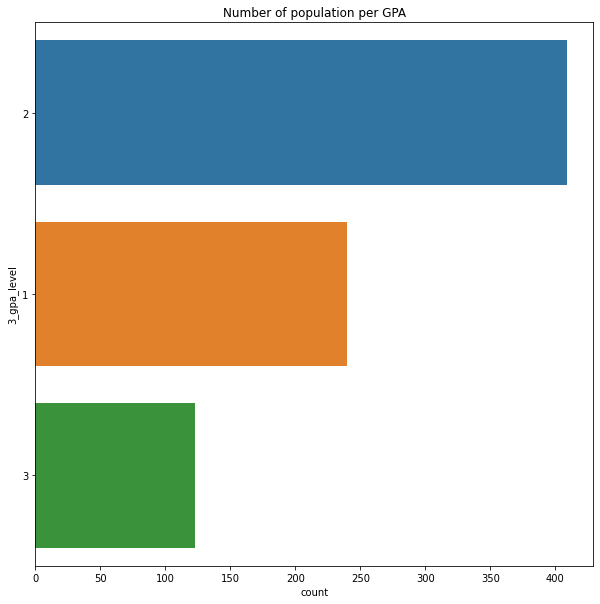

In [8]:
print('Number of students per gpa')
display(dataset['3_gpa_level'].value_counts())
fig=plt.figure(figsize=(10, 10))
a = sns.countplot(y = dataset['3_gpa_level'],order = dataset['3_gpa_level'].value_counts().index, data = dataset).set_title('Number of population per GPA')

Text(0.5, 1.0, 'Correlation Heatmap')

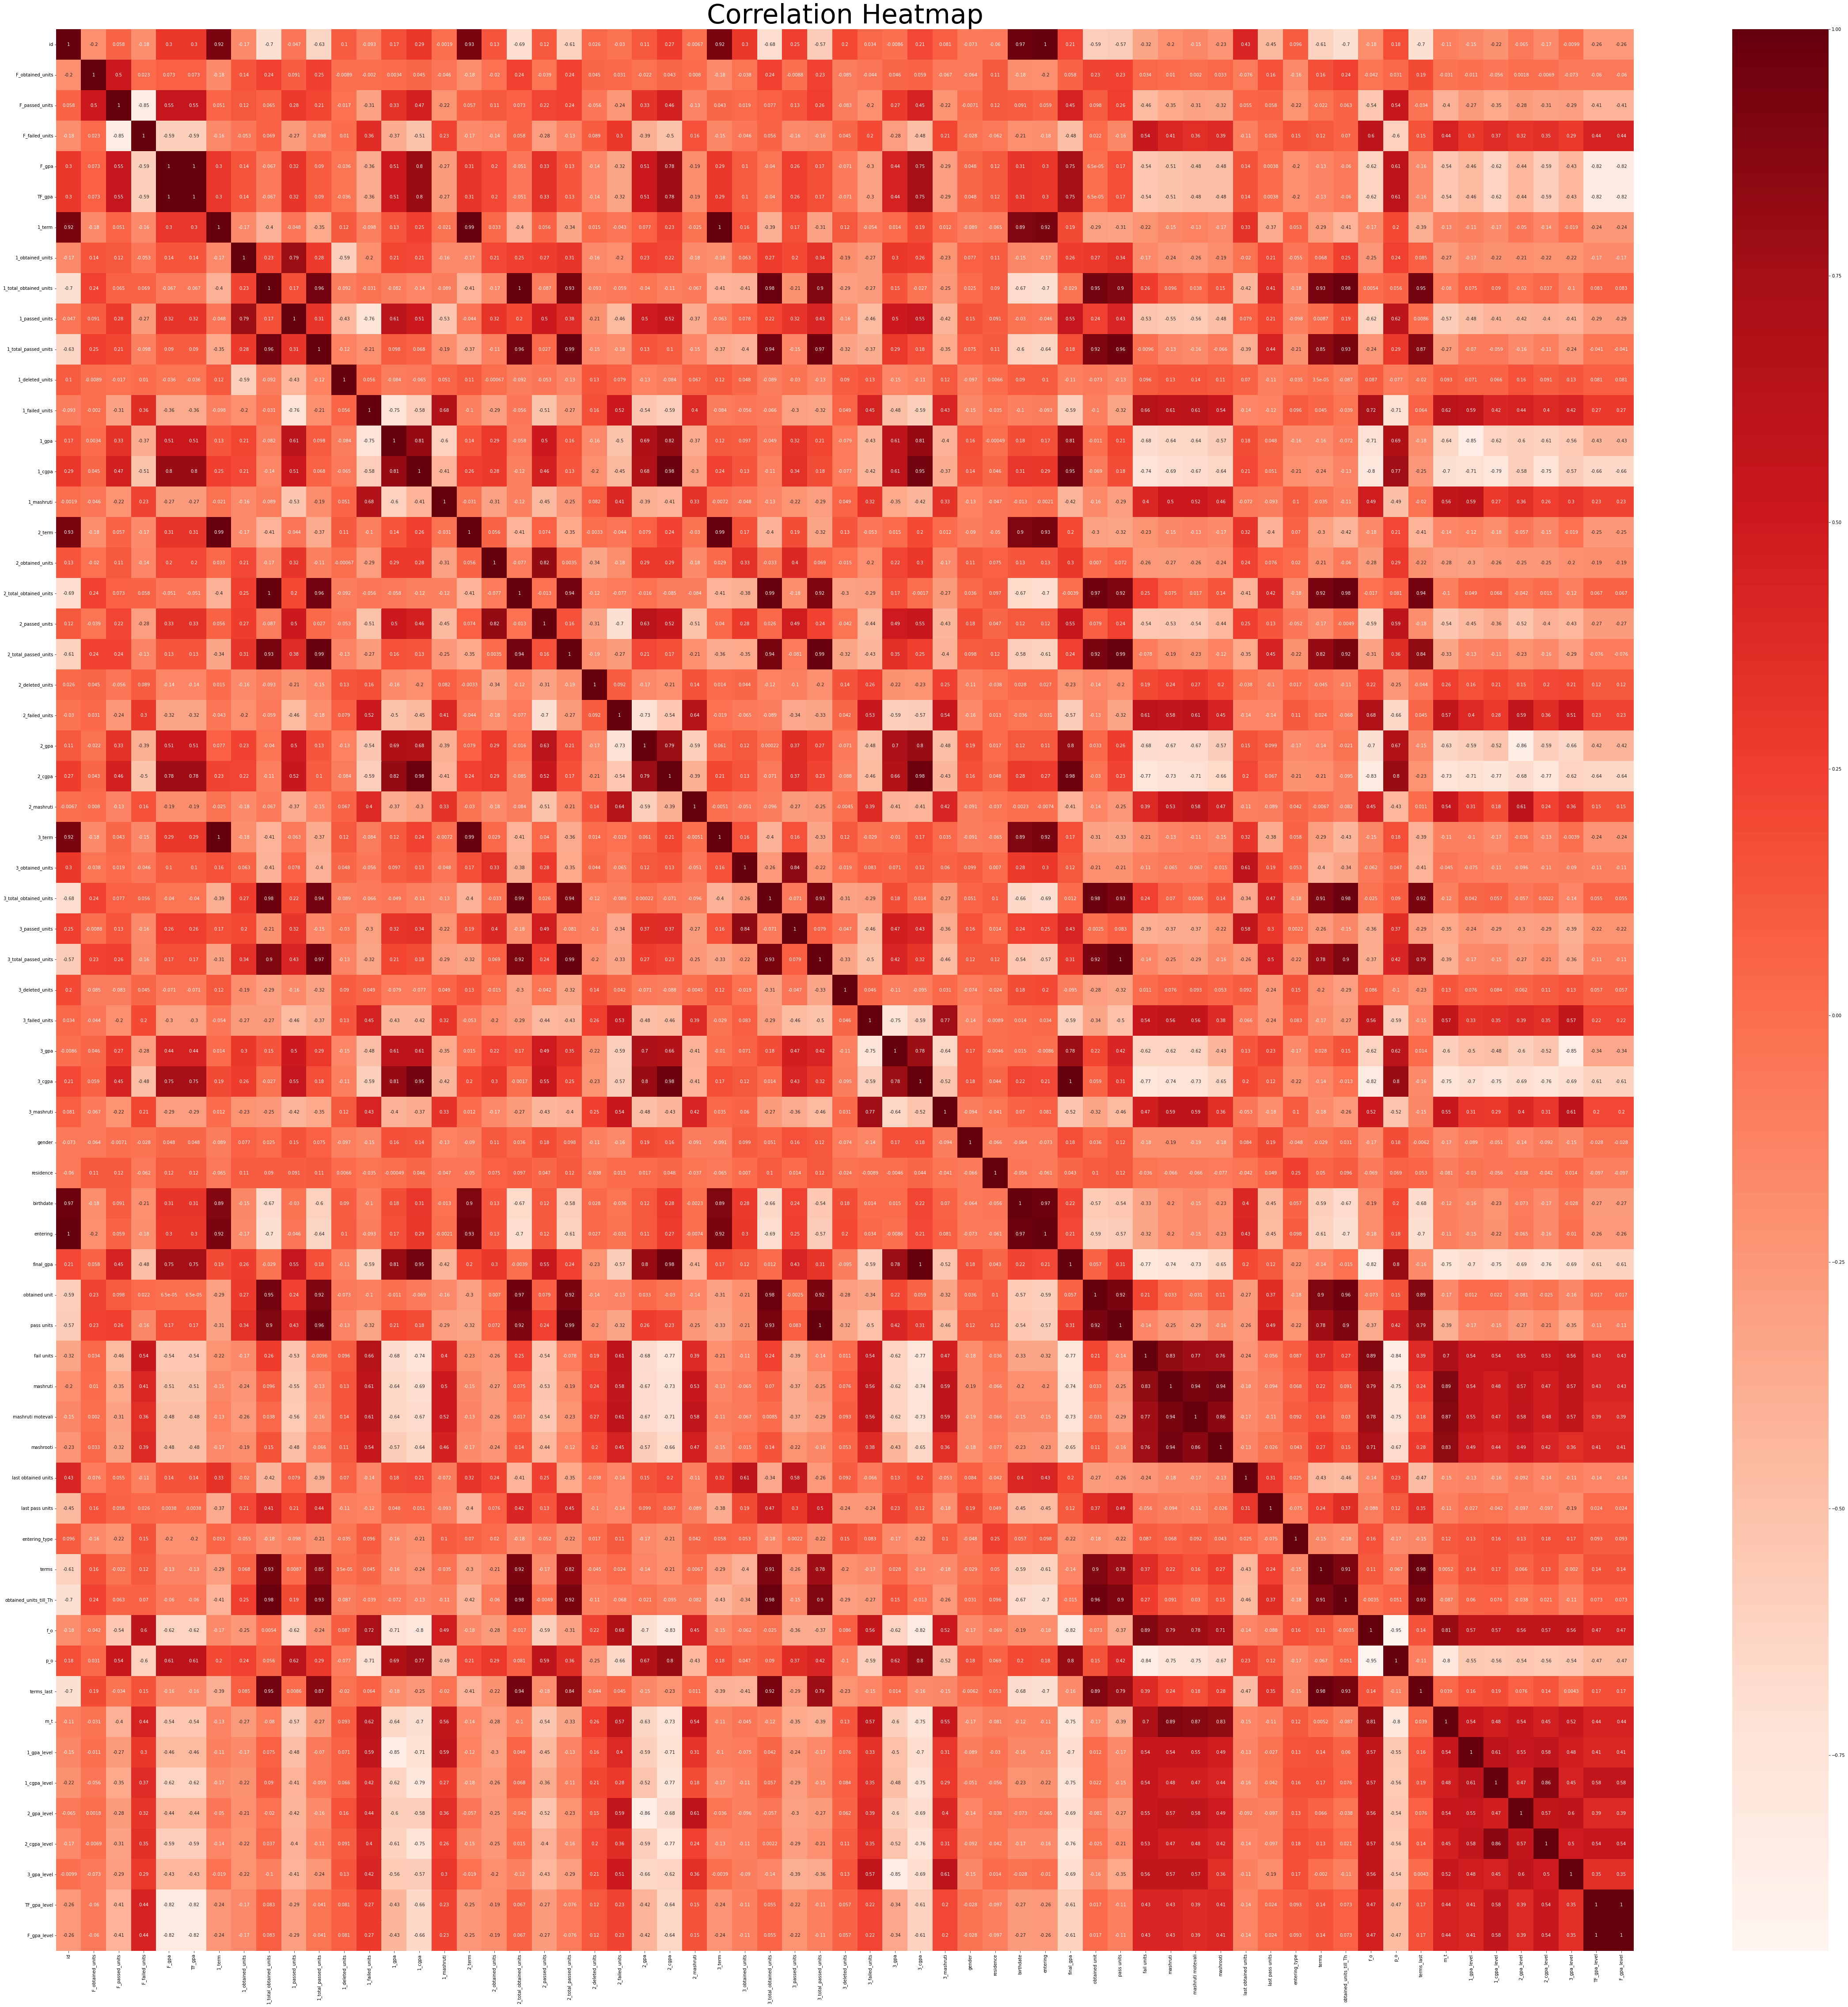

In [9]:
corr=dataset.corr()
plt.figure(figsize=(80,80))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=60)

In [10]:
X=dataset[[ '1_obtained_units', '1_total_obtained_units',
       '1_passed_units', '1_deleted_units',
       '1_failed_units', '1_gpa', '1_cgpa', '1_mashruti',
       '2_obtained_units', '2_total_obtained_units', '2_passed_units',
       '2_total_passed_units', '2_deleted_units', '2_failed_units', '2_gpa',
       '2_cgpa', '2_mashruti', '3_obtained_units',
       'gender', 'residence', 'birthdate', 'entering','mashrooti',
       'entering_type', 'obtained_units_till_Th', 'f_o','p_o',
       'terms_last', 'm_t', '1_gpa_level', '1_cgpa_level', '2_gpa_level',
       '2_cgpa_level','TF_gpa_level']]
Y=dataset['3_gpa_level']

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(X))
print(scaler.data_max_)
x=scaler.transform(X)

MinMaxScaler()
[2.40000000e+01 1.83000000e+02 2.40000000e+01 1.70000000e+01
 1.60000000e+01 1.96100000e+01 1.96700000e+01 1.00000000e+00
 2.40000000e+01 1.93000000e+02 2.40000000e+01 1.41000000e+02
 1.10000000e+01 1.60000000e+01 1.99800000e+01 1.96100000e+01
 1.00000000e+00 2.40000000e+01 1.00000000e+00 1.00000000e+00
 1.38100000e+03 9.80000000e+01 4.00000000e+00 5.00000000e+00
 2.02000000e+02 1.00000000e+00 1.01086956e+00 1.40000000e+01
 1.00000000e+00 3.00000000e+00 3.00000000e+00 3.00000000e+00
 3.00000000e+00 3.00000000e+00]


In [12]:
from sklearn.linear_model import LogisticRegressionCV
logisticClassifier = LogisticRegressionCV(cv=10,multi_class='multinomial', random_state=0).fit(x, Y)
logisticClassifier.score(x,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.7927461139896373

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2, random_state = 0, shuffle = True)

In [18]:
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression(random_state=0).fit(x_train,y_train)
y_pred = clf_logistic.predict(x_test)
print(classification_report(y_test,y_pred))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

              precision    recall  f1-score   support

           1       0.71      0.75      0.73        40
           2       0.78      0.84      0.81        90
           3       0.87      0.52      0.65        25

    accuracy                           0.77       155
   macro avg       0.79      0.70      0.73       155
weighted avg       0.77      0.77      0.76       155

     Actual  Predicted
549       2          2
684       2          2
402       2          3
14        2          2
552       1          1
..      ...        ...
421       2          1
514       3          3
222       1          2
590       2          2
369       1          1

[155 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [20]:
joblib.dump(clf_logistic, 'classifierNextGpa.joblib')

['classifierNextGpa.joblib']